## 一、相关库的引入
- seaborn：
  Seaborn是一种基于matplotlib的图形可视化python libraty。它提供了一种高度交互式界面，便于用户能够做出各种有吸引力的统计图表。
- scipy：
  SciPy是一款方便、易于使用、专为科学和工程设计的Python工具包.它包括统计,优化,整合,线性代数模块,傅里叶变换,信号和图像处理,常微分方程求解器等等.
  

In [1]:
# 导入需要的模块
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 用来绘图的，封装了matplot
# 要注意的是一旦导入了seaborn，
# matplotlib的默认作图风格就会被覆盖成seaborn的格式
import seaborn as sns       

from scipy import stats
from scipy.stats import  norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline  
# 为了在jupyter notebook里作图，需要用到这个命令

## 二、获取和读取数据集

In [2]:
data_train = pd.read_csv("./data/train.csv")
# data_train

## 三、数据分析

### 3.1 房价
首先直接来看一下*房价*分布情况：

绘制出关于*房价*的直方图和密度曲线，可见*房价*的密度分布接近正态分布，进一步可以使用**峰度（Kurtosis）**和 **偏度（Skewness）**来描述。

> 峰度（Kurtosis）:描述某变量所有取值分布形态<u>陡缓程度</u>的统计量。
>它是和正态分布相比较的。
>
>* Kurtosis=0 与正态分布的陡缓程度相同。
>
>* Kurtosis>0 比正态分布的高峰更加陡峭——尖顶峰
>
>* Kurtosis<0 比正态分布的高峰来得平坦——平顶峰计算公式：β = M_4 /σ^4 偏度：
>
>偏度（Skewness）：描述某变量取值分布<u>对称性</u>的统计量。
>
>* Skewness=0 分布形态与正态分布偏度相同
>
>* Skewness>0 正偏差数值较大，为正偏或右偏。长尾巴拖在右边。
>
>* Skewness<0 负偏差数值较大，为负偏或左偏。长尾巴拖在左边。 计算公式： S= (X^ - M_0)/δ Skewness 越大，分布形态偏移程度越大。

可以发现：峰度和坡度均大于0，说明*房价*的概率密度曲线相比于正态分布高峰更加陡峭，向右边偏移；*房价*更多的集中在150000附近，并且150000的右侧概率相比于左侧概率更密集。

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


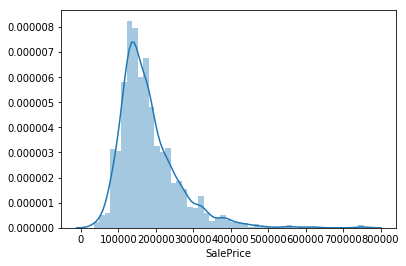

In [3]:
# data_train['SalePrice'].describe()
sns.distplot(data_train['SalePrice'])
# skewness and kurtosis
print(f"Skewness: {data_train['SalePrice'].skew()}")
print(f"Kurtosis: {data_train['SalePrice'].kurt()}")

### 3.2 其他属性
然后我们来看看可能决定*房价*的其他属性，数据集中给出的有79个，将这79个信息进行分类、概括，以便进行特征的选取。

首先将属性类型分类为三种：“building--0”、“space--1”、“location--2”。具体解释如下：
- building：比如房屋材料、造型等与房屋物理特性相关的特征（e.g. 'OverallQual'）
- space：即与房屋空间有关的特征，如面积(e.g. 'TotalBsmtSF')
- location：如地段、道路情况等(e.g. 'Neighborhood')

然后每种属性的数据类型分类两类：“数值型--0”和“类别型--1”

分类后的结果如下：

| 变量名        | 中文解释                 | 数据类型 | 分类     |
| ------------- | ------------------------ | -------- | -------- |
| MSSubClass    | 住宅类型                 | 1        | building |
| MSZoning      | 住宅所在分区类型         | 1        | location |
| LotFrontage   | 房子到街区的距离         | 0        | location |
| LotArea       | 面积                     | 0        | space    |
| Street        | 所在街道                 | 1        | location |
| Alley         | 所在小路                 | 1        | location |
| LotShape      | 户型不规则程度           | 1        | building |
| LandContour   | 平坦程度                 | 1        | building |
| Utilities     | 水电气供应               | 1        | building |
| LotConfig     | 位置（临街状态）         | 1        | location |
| LandSlope     | 倾斜程度                 | 1        | building |
| Neighborhood  | 邻接情况                 | 1        | location |
| Condition1    | 位置特征1（道路、铁路）  | 1        | location |
| Condition2    | 位置特征2（道路、铁路）  | 1        | location |
| BldgType      | 住宅类型（楼房类型）     | 1        | building |
| HouseStyle    | 风格                     | 1        | building |
| OverallQual   | 房屋的整体情况评级         | 1        | building |
| OverallCond   | 房屋的整体状况评级           | 1        | building |
| YearBuilt     | 建造年份                 | 1        | building |
| YearRemodAdd  | 重修年份                 | 1        | building |
| RoofStyle     | 屋顶类型                 | 1        | building |
| RoofMatl      | 屋顶材料                 | 1        | building |
| Exterior1st   | 外墙材料1                | 1        | building |
| Exterior2nd   | 外墙材料2                | 1        | building |
| MasVnrType    | 石材类型                 | 1        | building |
| MasVnrArea    | 石材面积                 | 0        | space    |
| ExterQual     | 外部材料质量评级         | 1        | building |
| ExterCond     | 外部材料现状评级         | 1        | building |
| Foundation    | 地基类型                 | 1        | building |
| BsmtQual      | 地基深度                 | 0        | space    |
| BsmtCond      | 地基现状评级             | 1        | building |
| BsmtExposure  | 地下室出口暴露情况       | 1        | building |
| BsmtFinType1  | 地下室第一次状况评级     | 1        | building |
| BsmtFinSF1    | 地下室第一次完工面积     | 0        | space    |
| BsmtFinType2  | 地下室第二次状况评级     | 1        | building |
| BsmtFinSF2    | 地下室第二次完工面积     | 0        | space    |
| BsmtUnfSF     | 地下室未完成面积         | 0        | space    |
| TotalBsmtSF   | 地下室总面积             | 0        | space    |
| Heating       | 供暖类型                 | 1        | building |
| HeatingQC     | 供热质量状况评级         | 1        | building |
| CentralAir    | 是否有中央空调           | 1        | building |
| Electrical    | 电力系统类型（熔断机制） | 1        | building |
| 1stFlrSF      | 一楼面积                 | 0        | space    |
| 2ndFlrSF      | 二楼面积                 | 0        | space    |
| LowQualFinSF  | 低质量完工面积           | 0        | space    |
| GrLivArea     | 地面以上面积             | 0        | space    |
| BsmtFullBath  | 地下室全浴室             | 0        | space    |
| BsmtHalfBath  | 地下室半浴室             | 0        | space    |
| FullBath      | 地面以上全浴室           | 0        | space    |
| HalfBath      | 地面以上半浴室           | 0        | space    |
| BedroomAbvGr  | 地面以上卧室             | 0        | space    |
| KitchenAbvGr  | 地面以上厨房             | 0        | space    |
| KitchenQual   | 厨房质量评级             | 1        | building |
| TotRmsAbvGrd  | 地面以上房间数           | 0        | space    |
| Functional    | 房屋功能完整程度         | 1        | building |
| Fireplaces    | 壁炉数量                 | 1        | building |
| FireplaceQu   | 壁炉质量评级             | 1        | building |
| GarageType    | 车库类型                 | 1        | building |
| GarageYrBlt   | 车库建造年份             | 1        | building |
| GarageFinish  | 车库装修是否完成         | 1        | building |
| GarageCars    | 车库容量                 | 0        | space    |
| GarageArea    | 车库面积                 | 0        | space    |
| GarageQual    | 车库质量评级             | 1        | building |
| GarageCond    | 车库现状评级             | 1        | building |
| PavedDrive    | 车道铺装类型             | 1        | building |
| WoodDeckSF    | 木质地板面积             | 0        | space    |
| OpenPorchSF   | 开放式门廊面积           | 0        | space    |
| EnclosedPorch | 封闭式门廊面积           | 0        | space    |
| 3SsnPorch     | 时令门廊面积             | 0        | space    |
| ScreenPorch   | 屏幕门廊面积             | 0        | space    |
| PoolArea      | 游泳池面积               | 0        | space    |
| PoolQC        | 游泳池质量评级           | 1        | building |
| Fence         | 栅栏质量评级             | 1        | building |
| MiscFeature   | 其他功能                 | 1        | building |
| MiscVal       | 该其他功能价值           | 1        | building |
| MoSold        | 卖出月份                 | 1        | building |
| YrSold        | 卖出年份                 | 1        | building |
| SaleType      | 交易类型                 | 1        | building |
| SaleCondition | 交易情况                 | 1        | building |

然后继续在这些特征中找一些认为比较重要的特征详细的看看。

#### 3.2.1 类别型属性

##### 3.2.1.1 CentralAir 中央空调

有中央空调的房子售价普遍要高一些

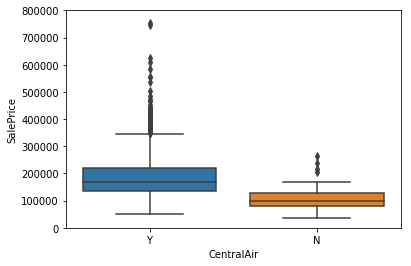

In [4]:
# CentralAir
var = 'CentralAir'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1) # 横向表的拼接
fig = sns.boxplot(x=var, y="SalePrice", data=data)  # 绘制箱型图
fig.axis(ymin=0, ymax=800000);

##### 3.2.1.2 OverallQual 总体评价
评分越高售价越高

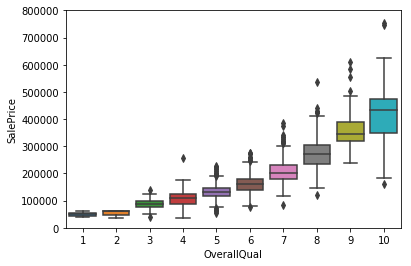

In [5]:
# OverallQual
var = 'OverallQual'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

##### 3.2.1.3 YearBuilt 建造年份
规律似乎不太明显，但是可以看出新建的房屋的售价会相对高一点，但是影响比较小。这一点散点图比箱型图表现的更加明显。

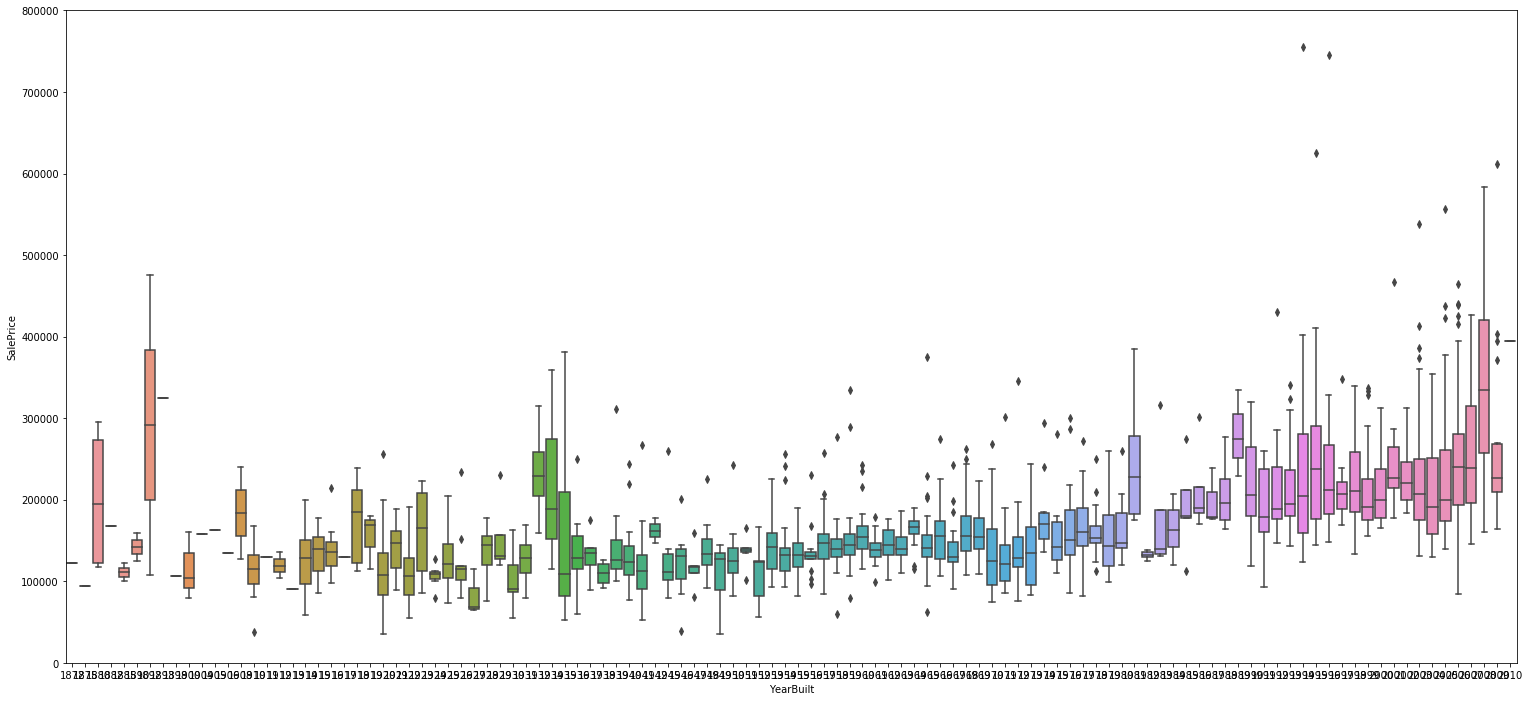

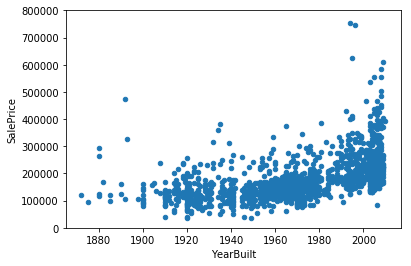

In [6]:
# YearBuilt boxplot
var = 'YearBuilt'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
f, ax = plt.subplots(figsize=(26, 12)) # 指定图片大小
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

# YearBuilt  scatter
var = 'YearBuilt'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
data.plot.scatter(x=var, y="SalePrice", ylim=(0, 800000))

##### 3.2.1.4 Neighborhood 地段
在一些地段（如*NoRidge*、*NridgHt*、*StoneBr*）房屋i的售价偏高，而另一些地段（如*BrkSide*、*MeadowV*）房屋的售价偏低；可见可对地段做一个聚类，存在高价格地段、低价格地段的分类。

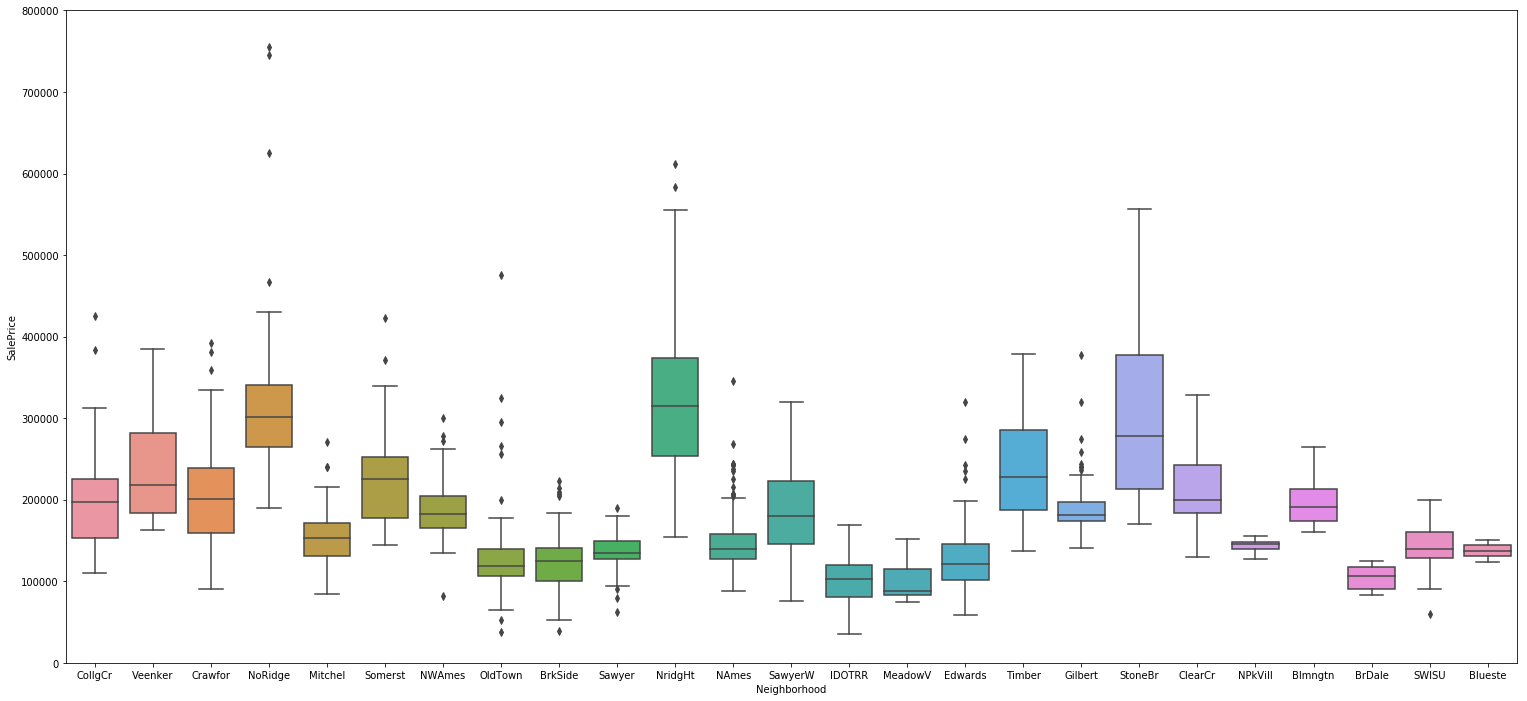

In [7]:
# Neighborhood  boxplot
var = 'Neighborhood'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
f, ax = plt.subplots(figsize=(26, 12))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);


#### 3.2.2 数值型特征

##### 3.2.2.1 LotArea 面积
在相同面积条件下，一般对应的价格比较分散；似乎地表面积对于价格的影响不大。

所以不考虑将面积作为特征属性。

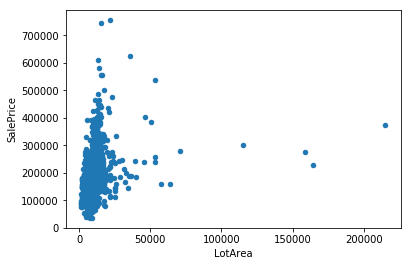

In [8]:
var ="LotArea"
data=pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0.800000))

##### 3.2.2.2 GrLivArea 地表面积
地表面积的增加可能会导致房屋售价的增加，但是这种影响是不确定的，仍存在相当一部分数据，大地表面积的房屋和小地表面积的房屋售价相近。

但可以确认的是，地表面积影响了房屋售价的上限，房屋售价的上限大致与地表面积呈正比。

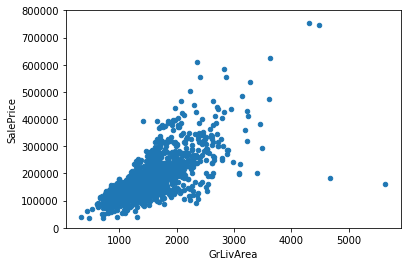

In [9]:
var ='GrLivArea'
data=pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

##### 3.2.2.3 TotalBsmtSF 地下室总面积
地下室面积的增大会导致售价的升高，但这种影响不是一定的。

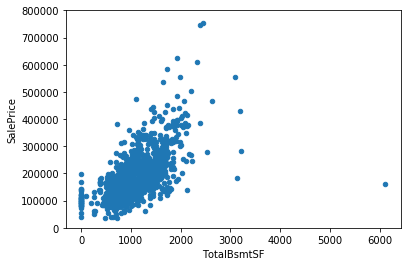

In [10]:
var ='TotalBsmtSF'
data=pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

##### 3.2.2.4 MiscVal 其他功能价值 
其他功能价值的值不会对房屋价格产生太大影响。

所以不考虑将其他功能价值作为特征属性。

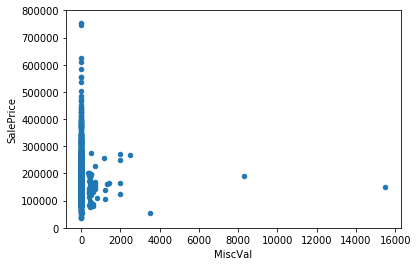

In [11]:
var='MiscVal'
data=pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

##### 3.2.2.5  GarageArea 车库面积
车库面积的增大可能会导致售价增高

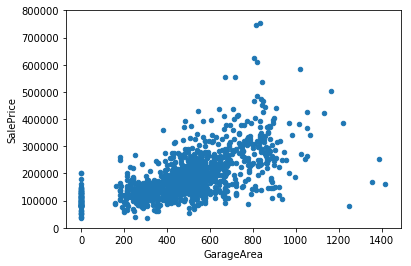

In [12]:
var='GarageArea'
data=pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

##### 3.2.2.5  GarageCars 车库容量
车库容量的增大会导致房屋售价的上限增大。

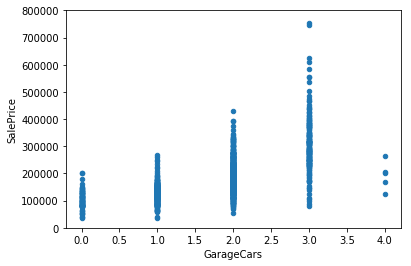

In [13]:
var='GarageCars'
data=pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

#### 3.2.3 更加详细的分析
上面选择了一些自己关心的属性进行分析，但是这是不全面和相当主观的，下面会用关系矩阵和关系点图进行进一步分析。

##### 3.2.3.1 关系矩阵
>**随机变量的方差的性质**：
>
>设X，Y是两个随机变量，E(X)，E(Y)，D(X)，D(Y)分别为各自的期望和方差，则有:
>
>$$D(X+Y)=D(X)+D(Y)+2E(X−E(X))(Y−E(Y)) \tag{$1$} $$
>
>特别的，当X，Y相互独立时，有:
>
>$$D(X+Y)=D(X)+D(Y) \tag{$2$} $$
>
>对比（1）式和（2）式知，X，Y相互独立时还应该有:
>$$E(X−E(X))(Y−E(Y))=0 \tag{$3$} $$
>
>这意味着当$E(X−E(X))(Y−E(Y))≠0$时，X与Y不相互独立，而是存在一定关系的。
>
>**相关系数和协方差**：
>
>我们把$E(X−E(X))(Y−E(Y))$拿出来，单独定义一个概念，即协方差，记为$Cov(X,Y)$，即：
>
>$$Cov(X,Y)=E(X−E(X))(Y−E(Y)) \tag{$4$}$$ 
>
>而
>
>$$ρ_{XY}=\frac{Cov(X,Y)}{\sqrt{DX}\sqrt{DY}} \tag{$5$} $$
>
>称为随机变量X，Y的相关系数。

计算每列属性的之间的相关系数，我们关注的是其他属性与*SalePrice*的相关性，将这些相关系数提取出来之后，按降序排序，可见将相关性最强的几个属性是*OverallQual*、*GrLivArea*、*GarageCars*，恰好我们之前关注过，说明我们平常关于房价的经验在这个数据集上也是符合的。

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

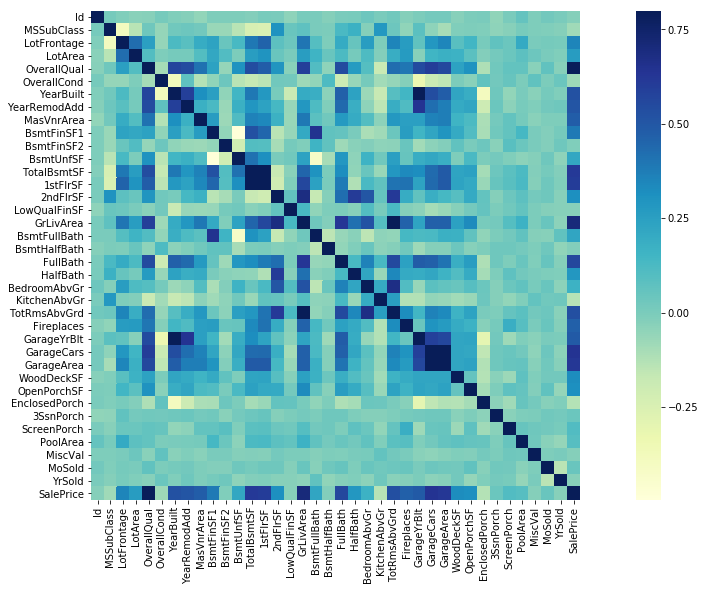

In [45]:
corrmat = data_train.corr() #计算列与列之间的相关系数，返回相关系数矩阵
f, ax = plt.subplots(figsize=(20, 9))
# 热度图  显示数据值的最大值为0.8，正方形网格
sns.heatmap(corrmat, vmax=0.8, square=True,cmap="YlGnBu") 
corr=corrmat['SalePrice'].sort_values(ascending=False)
corr

仔细观察可以发现上面的矩阵中，属性远少于原本的79个，这是因为只有数值型的属性参与的了计算，而离散型的属性并没有，所以需要将这些属性进行处理。

这里仅对*CentralAir*和*Neighborhood*进行了转换。

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
CentralAir       0.251328
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
Neighborhood     0.210851
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorc

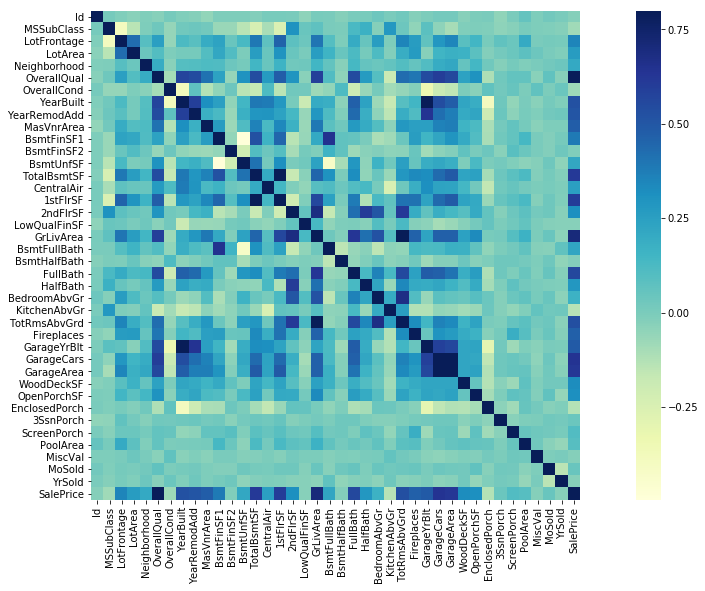

In [47]:
from sklearn import preprocessing
f_names = ['CentralAir', 'Neighborhood']
for x in f_names:
    label = preprocessing.LabelEncoder()
    data_train[x] = label.fit_transform(data_train[x])
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True,cmap="YlGnBu") 
corr=corrmat['SalePrice'].sort_values(ascending=False)
corr

#### 3.2.3.2 房价关系矩阵

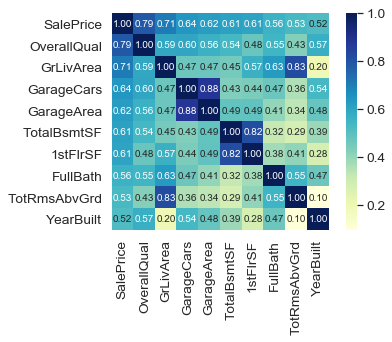

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [72]:
k  = 10 # 关系矩阵中将显示10个特征
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, \
                 square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,cmap="YlGnBu")
plt.show()
cols

我们在相关性最强的前9个属性中选取特征，这前十个特征分别是：'OverallQual'房屋的整体情况评级、'GrLivArea'地面以上面积,、'GarageCars'车库容量、'GarageArea'车库面积、'TotalBsmtSF'地下室总面积、'1stFlrSF'一层总面积、 'FullBath'地下室全浴室数量,、'TotRmsAbvGrd'地面以上房间数、 'YearBuilt'建造年份。

'GarageCars'车库容量和'GarageArea'车库面积中选取GarageCars作为特征。

'TotalBsmtSF'地下室总面积和'1stFlrSF'一层总面积选取TotalBsmtSF作为特征。

最终考虑的特征如下：

| Variable         | Segment | Data Type | Comments     |
| ---------------- | ------- | --------- | ------------ |
| **GrLivArea**    | 1       | 0         | 生活面积     |
| **TotRmsAbvGrd** | 1       | 0         | 总房间数     |
| **FullBath**     | 1       | 0         | 浴室数量     |
| **TotalBsmtSF**  | 1       | 0         | 地下室总面积 |
| **GarageCars**   | 1       | 0         | 车库         |
| **YearBuilt**    | 0       | 1         | 建造年份     |
| **OverallQual**  | 0       | 1         | 总体评价     |

In [79]:
from sklearn import preprocessing
from sklearn import linear_model, svm, gaussian_process
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

标准化：原始分数减去平均数然后除以标准差；得到的结果是，对于每个属性/每列来说所有数据都聚集在0附近，方差为1。使得预测结果不会被某些维度过大的特征值而主导

In [82]:
# 获取数据
cols = ['OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
x = data_train[cols].values
y = data_train['SalePrice'].values
#  标准化
x_scaled = preprocessing.StandardScaler().fit_transform(x)
y_scaled = preprocessing.StandardScaler().fit_transform(y.reshape(-1,1))#这里把 y 用 reshape 转换成 2-D array
X_train,X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.33, random_state=42) #划分为训练子集和测试子集

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]], dtype=int64)

由上面结果选择随机森林回归算法，为了更直观地观察训练结果，我将显示一下未归一化数据的预测效果。

In [83]:
clfs = {
        'svm':svm.SVR(), 
        'RandomForestRegressor':RandomForestRegressor(n_estimators=400),
        'BayesianRidge':linear_model.BayesianRidge() #贝叶斯回归模型
       }
for clf in clfs:
    try:
        clfs[clf].fit(X_train, y_train)
        y_pred = clfs[clf].predict(X_test)
        print(clf + " cost:" + str(np.sum(y_pred-y_test)/len(y_pred)) )
    except Exception as e:
        print(clf + " Error:")
        print(str(e))

svm cost:-17.96730634760857
RandomForestRegressor cost:-2.578057453698704
BayesianRidge cost:-17.19150469291163


In [85]:
cols = ['OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
x = data_train[cols].values
y = data_train['SalePrice'].values

X_train,X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

clf = RandomForestRegressor(n_estimators=400)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)

# 保存clf，共下面计算测试集数据使用
# rfr = clf

array([140605.75      , 308351.9875    , 124848.5625    , 172032.625     ,
       307433.355     ,  78839.625     , 190170.5       , 152469.75      ,
        79025.625     , 114451.055     , 162661.1625    , 123199.75      ,
        93808.375     , 222610.4925    , 188980.        , 120993.        ,
       194789.4375    , 130623.125     , 120408.9475    , 197365.6       ,
       165132.2075    , 219676.225     , 170272.0575    , 124150.06666667,
       186930.825     , 167151.98833333, 200420.1525    ,  96659.125     ,
       187606.5       , 202934.045     , 111189.25      , 233322.7675    ,
       178728.3975    , 109688.04166667, 257003.0875    , 140534.4375    ,
       160787.2625    , 205738.27      , 309981.4775    , 106417.5       ,
       133541.        , 232471.0975    , 119628.375     , 373241.6575    ,
       139547.125     , 169887.2225    , 125419.20833333, 116828.55      ,
       436621.425     , 145368.645     , 119205.375     , 186020.375     ,
       125208.53791667, 3

In [62]:
sum(abs(y_pred - y_test))/len(y_pred)

19688.780304275337

In [ ]:
验证测试集

In [63]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# 之前训练的模型
rfr = clf

In [139]:
data_test = pd.read_csv("./data/test.csv")

查看测试集中的缺失值的情况，发现缺失值较少，所以直接将缺失值改为了该列的均值。所以需要先算出平均值。

In [127]:
data_test[cols].isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      1
TotalBsmtSF     1
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
dtype: int64

In [128]:
data_test['GarageCars'].describe()

count    1458.000000
mean        1.766118
std         0.775945
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64

In [129]:
data_test['TotalBsmtSF'].describe()

count    1458.000000
mean     1046.117970
std       442.898624
min         0.000000
25%       784.000000
50%       988.000000
75%      1305.000000
max      5095.000000
Name: TotalBsmtSF, dtype: float64

In [144]:
for col in cols:
    if(data_test[col].isnull().sum()!=0): 
        print(col)
        print(np.mean(data_test[col]))
        data_test[col].fillna(data_test[col].mean(),inplace = True)
data_test[cols].isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
dtype: int64

In [145]:
x = data_test_x.values
y_te_pred = rfr.predict(x)
print(y_te_pred)

print(y_te_pred.shape)
print(x.shape)

[ 95284.51       106814.97333333 137728.835      ... 101545.43625
  96085.385      177235.0975    ]
(1459,)
(1459, 7)


In [69]:
data_test_x

,OverallQual,GrLivArea,FullBath,TotRmsAbvGrd,YearBuilt,GarageCars,TotalBsmtSF
0,5,896,1,5,1961,1.0,882.0
1,6,1329,1,6,1958,1.0,1329.0
2,5,1629,2,6,1997,2.0,928.0
3,6,1604,2,7,1998,2.0,926.0
4,8,1280,2,5,1992,2.0,1280.0
5,6,1655,2,7,1993,2.0,763.0
6,6,1187,2,6,1992,2.0,1168.0
7,6,1465,2,7,1998,2.0,789.0
8,7,1341,1,5,1990,2.0,1300.0
9,4,882,1,4,1970,2.0,882.0


In [70]:
prediction = pd.DataFrame(y_te_pred, columns=['SalePrice'])
result = pd.concat([ data_test['Id'], prediction], axis=1)
# result = result.drop(resultlt.columns[0], 1)
result.columns
result.to_csv('./data/predictions.csv', index=False)

## 特征工程

## 模型选择

## 模型融合

## 修改特征和模型参数